In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C


In [4]:
df_new = df.copy()

In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_new["Age"].fillna(df_new["Age"].mean(), inplace=True)

C:\Users\atifs\AppData\Local\Temp\ipykernel_19076\1385179665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["Age"].fillna(df_new["Age"].mean(), inplace=True)


In [7]:
df_new.drop(columns=["PassengerId","Name", "Ticket", "Fare", "SibSp", "Parch", "Cabin"], inplace=True)

In [8]:
df_new

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


In [9]:
# y = df_new[["Survived"]].copy()

In [10]:
df_new.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,13.002015
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,29.699118
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


In [38]:
df_encoded = pd.get_dummies(df_new, columns=["Pclass","Sex", "Embarked"], dtype=int)

In [40]:
df_encoded

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,1,0,0,1,0,0,1
887,1,19.000000,1,0,0,1,0,0,0,1
888,0,29.699118,0,0,1,1,0,0,0,1
889,1,26.000000,1,0,0,0,1,1,0,0


In [42]:
df_encoded.corr()

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.069809,0.285904,0.093349,-0.322308,0.543351,-0.543351,0.168240,0.003650,-0.155660
Age,-0.069809,1.000000,0.319916,0.006589,-0.281004,-0.084153,0.084153,0.032024,-0.013855,-0.027121
Pclass_1,0.285904,0.319916,1.000000,-0.288585,-0.626738,0.098013,-0.098013,0.296423,-0.155342,-0.170379
Pclass_2,0.093349,0.006589,-0.288585,1.000000,-0.565210,0.064746,-0.064746,-0.125416,-0.127301,0.192061
Pclass_3,-0.322308,-0.281004,-0.626738,-0.565210,1.000000,-0.137143,0.137143,-0.153329,0.237449,-0.009511
Sex_female,0.543351,-0.084153,0.098013,0.064746,-0.137143,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.084153,-0.098013,-0.064746,0.137143,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,0.032024,0.296423,-0.125416,-0.153329,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,-0.013855,-0.155342,-0.127301,0.237449,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,-0.027121,-0.170379,0.192061,-0.009511,-0.125722,0.125722,-0.778359,-0.496624,1.000000


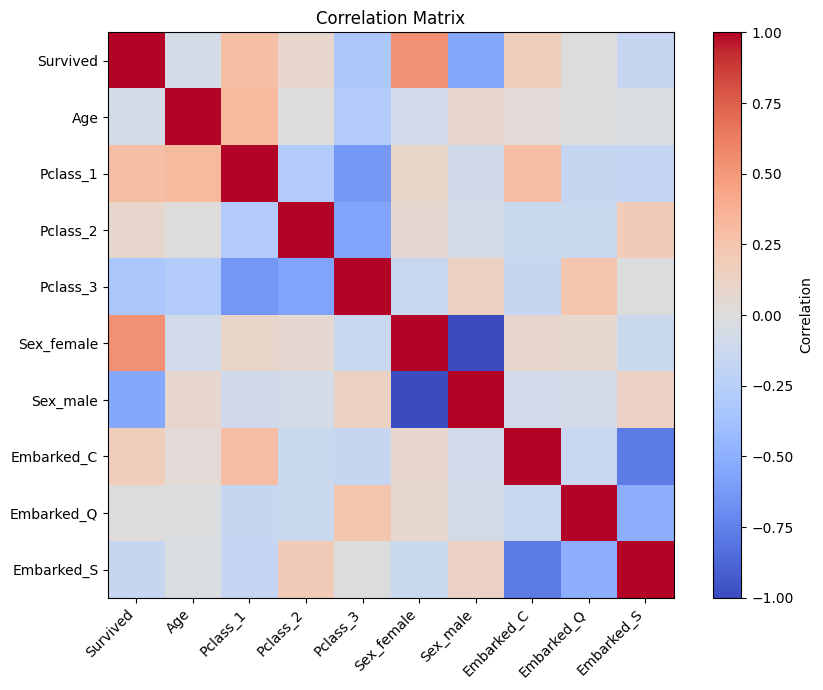

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix (only numeric columns)
corr = df_encoded.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(9,7))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Tick marks
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)

# Color bar
fig.colorbar(im, ax=ax, label='Correlation')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

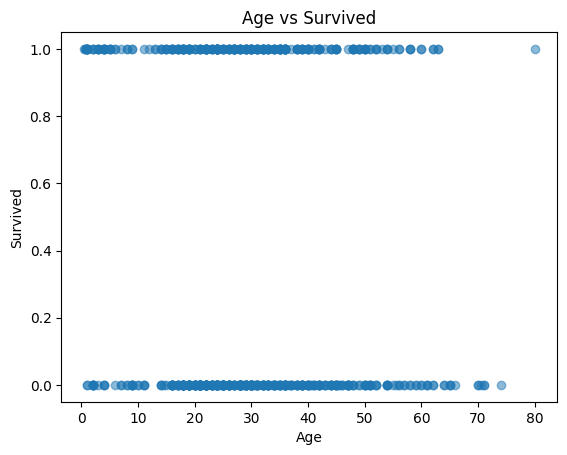

In [100]:
import matplotlib.pyplot as plt

x = df['Age']          # example numeric variable
y = df['Survived']     # second variable (0/1 for example)

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age vs Survived')
plt.show()


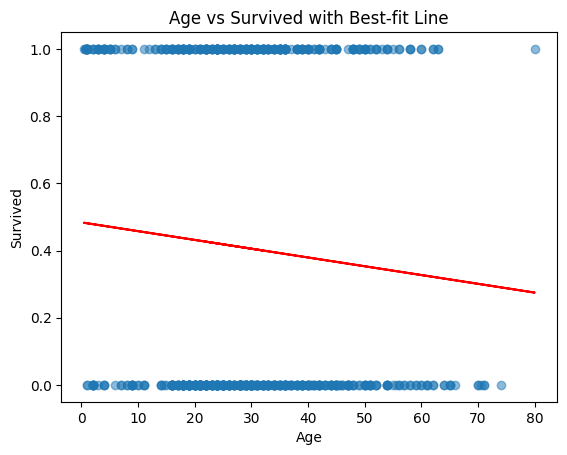

In [102]:
import numpy as np

# remove NaN
mask = ~(x.isna() | y.isna())
x_vals = x[mask]
y_vals = y[mask]

# coefficients of line y = m*x + c
m, c = np.polyfit(x_vals, y_vals, 1)

plt.scatter(x_vals, y_vals, alpha=0.5)
plt.plot(x_vals, m*x_vals + c, color='red')  # best-fit line
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Age vs Survived with Best-fit Line')
plt.show()


In [104]:
corr = x_vals.corr(y_vals)
print("Pearson correlation:", corr)


Pearson correlation: -0.07722109457217759
